In [1]:
# Este script identifica las clases de comunicación dentro del rango establecido. 
# Para propósito de ilustración he definido tres rangos, Pasivos, Asertivos y Agresivos. 
# La lista de palabras claves tranquilamente puede ser extendida o reducida.
# ALGORITMO DE CLASIFICACIÓN 
import sqlite3 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# Conexión a la base SQLite
sql_conn = sqlite3.connect('database.sqlite')

In [3]:
df = pd.read_sql("SELECT score, body FROM May2015 WHERE LENGTH(body) > 5 AND LENGTH(body) < 100 LIMIT 230000", sql_conn) 

In [4]:
keywords = pd.DataFrame({
'Pasivo': pd.Series(['if you have the time','hmm','well','that was my fault','not sure','do not worry', 'can we talk', 
'blah','callous', 'cool', 'latent', 'lethargic', 'lurking', 'on the shelf', 'out of action', 'potential', 'prepatent', 'quiescent', 'sidelined', 'slack', 
'cold', 'cold-hearted', 'cold-shoulder', 'forbidding', 'formal', 'frosty', 'icy', 'impotent', 'indifferent', 'lifeless']), 
'Asertivo': pd.Series(['good idea','great idea','thanks for','good to know','really like', 'too','sorry for','Speaks openly','confident', 'assured', 
'certain', 'believing', 'calm', 'convinced', 'positive', 'questionless', 'satisfied', 'secure', 'undisturbed', 'undoubtful', 
'undoubting', 'unperturbed', 'untroubled', 'advantageous', 'arresting', 'bossy', 'compelling', 'controlling', 'dominant', 'forceful']), 
'Agresivo': pd.Series(['fuck','fucking','ass','idiot', 'moron', 'asshole','dumbass', 'aggressive', 'agile', 'alert', 
'chipper', 'daring', 'dashing', 'dexterous', 'diligent', 'dynamic', 'eager', 'energetic', 'engaged', 'enlivened',  
'avid', 'ball of fire', 'bent upon', 'climbing', 'come on', 'come on strong', 'designing', 'desirous', 'eager beaver', 'get up and go']), 
})

In [5]:
content_summary = pd.DataFrame() 
for col in keywords: 
    content = df[df.body.apply(lambda x: any(keyword in x.split() for keyword in keywords[col]))] 
    content_summary[col] = content.describe().score 
    
keys = content_summary.keys() 

content_summary = content_summary.transpose()

C:\Users\Daniel Coello\AppData\Local\Temp\ipykernel_25556\4168652441.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(rect.get_x()+rect.get_width()/2., 1.05*height, '%s'% ("Score {0:.2f}".format(content_summary['mean'][ii])), ha='center', va='bottom')
C:\Users\Daniel Coello\AppData\Local\Temp\ipykernel_25556\4168652441.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(rect.get_x()+rect.get_width()/2., 1.15*height, '%s'% ("Score {0:.0f}".format(content_summary['count'][ii])), ha='center', va='bottom')


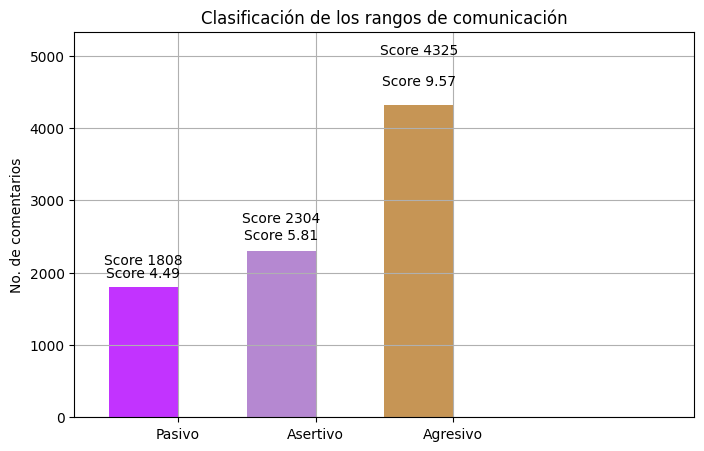

In [6]:
pos = list(range(len(content_summary['count']))) 
width = 0.50 
# Agregando las posiciones de anchura para las barras. 
# Construyendo las barras 
fig, ax = plt.subplots(figsize=(8,5)) 

clrs = [] 
for v in content_summary['mean'].values: 
    if v < 1: 
        clrs.append('#FF0000') 
    elif v < 2.5: 
        clrs.append('#FF0073') 
    elif v < 5: 
        clrs.append('#B300FF') 
    elif v < 6: 
        clrs.append('#A36AC6') 
    elif v < 7: 
        clrs.append('#6C6AC6') 
    elif v < 8: 
        clrs.append('#6AC681') 
    elif v < 9: 
        clrs.append('#BCDA52') 
    elif v < 10: 
        clrs.append('#B87B2B') 
    else: 
        clrs.append('r')

plt.bar(pos,         
        content_summary['count'], 
        width, 
        alpha=0.8, 
        color=clrs, 
        label=keys)

# Capa Y 
ax.set_ylabel('No. de comentarios') 
ax.set_title('Clasificación de los rangos de comunicación') 
# Capa X 
ax.set_xticks([p + 0.5 * width for p in pos]) 
# Setear las capas de las llaves en el eje X 
ax.set_xticklabels(keys) 
# Establecer el eje X y Y 
plt.xlim(min(pos)-width, max(pos)+width*4) 
plt.ylim([0, max(content_summary['count'])+1000])

rects = ax.patches

# Hacer las etiquetas 
for ii,rect in enumerate(rects): 
        height = rect.get_height() 
        plt.text(rect.get_x()+rect.get_width()/2., 1.05*height, '%s'% ("Score {0:.2f}".format(content_summary['mean'][ii])), ha='center', va='bottom') 
        plt.text(rect.get_x()+rect.get_width()/2., 1.15*height, '%s'% ("Score {0:.0f}".format(content_summary['count'][ii])), ha='center', va='bottom') 

plt.grid() 

In [7]:
print("Podemos obtener la media de las diferentes conductas sociales") 
print(content_summary)

Podemos obtener la media de las diferentes conductas sociales
           count      mean        std    min  25%  50%  75%     max
Pasivo    1808.0  4.494469  41.900044  -47.0  1.0  2.0  3.0  1745.0
Asertivo  2304.0  5.808594  42.995060  -21.0  1.0  2.0  3.0  1492.0
Agresivo  4325.0  9.567168  76.013369 -113.0  1.0  2.0  5.0  3416.0
